In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np

n = 1000
p = 200

Theta = np.random.randn(p, n)
y = np.random.randn(p)

def L1_norm(x):
    return np.linalg.norm(x,ord=1)

constr = ({'type': 'eq', 'fun': lambda x: Theta @ x - y})
x0 = np.linalg.pinv(Theta) @ y
res = minimize(L1_norm, x0, method = 'SLSQP', constraints= constr)
s_L1 = res.x


(array([  2.,   0.,   0.,   4.,   7.,   8.,  10.,   8.,  18.,  39., 751.,
         58.,  29.,   9.,  13.,   4.,   6.,   3.,   6.,   2.]),
 array([-0.105, -0.095, -0.085, -0.075, -0.065, -0.055, -0.045, -0.035,
        -0.025, -0.015, -0.005,  0.005,  0.015,  0.025,  0.035,  0.045,
         0.055,  0.065,  0.075,  0.085,  0.095]),
 <BarContainer object of 20 artists>)

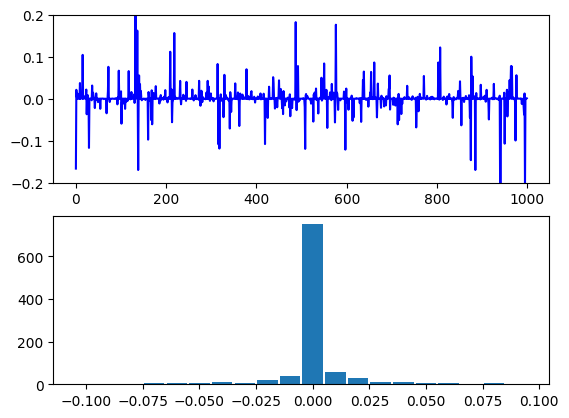

In [8]:
fig,axs = plt.subplots(2,1)
axs = axs.reshape(-1)
axs[0].plot(s_L1,color='b',linewidth=1.5)
axs[0].set_ylim(-0.2,0.2)
axs[1].hist(s_L1,bins=np.arange(-0.105,0.105,0.01),rwidth=0.9)

<h3> robust regression </h3>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize

plt.rcParams['figure.figsize'] = [7,7]
plt.rcParams.update({'font.size': 18})

In [4]:
x = np.sort(4 * (np.random.rand(25,1)-0.5), axis = 0)
b = 0.9 * x + 0.1 * np.random.randn(len(x),1)
atrue = np.linalg.lstsq(x,b,rcond=None)[0]
atrue = atrue.item(0)

b[-1] = -5.5
aL2 = np.linalg.lstsq(x,b,rcond=None)[0]
aL2 = aL2.item(0)

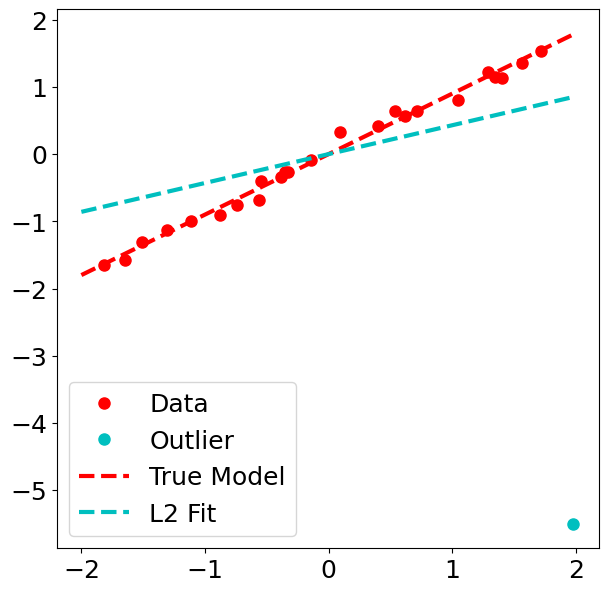

In [5]:
plt.plot(x[:-1], b[:-1],'o',color='r',ms=8,label='Data')
plt.plot(x[-1], b[-1],'o',color='c',ms=8,label='Outlier')

xgrid = np.arange(-2,2,0.01)
plt.plot(xgrid,atrue*xgrid,'--',linewidth=3,color='r',label='True Model')
plt.plot(xgrid,aL2*xgrid,'--',linewidth=3,color='c',label='L2 Fit')
plt.legend()
plt.show()



In [6]:
def L1_norm(a):
    return np.linalg.norm(a*x-b,ord=1)

a0 = aL2
res = minimize(L1_norm, a0)
aL1 = res.x[0]

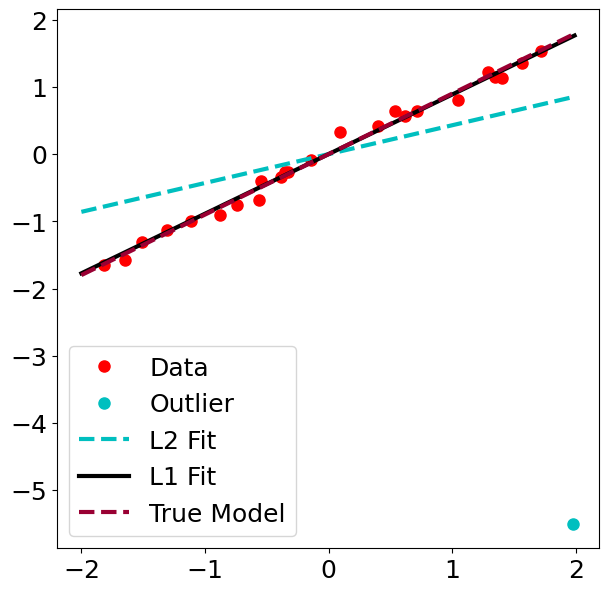

In [11]:
plt.plot(x[:-1], b[:-1],'o',color='r',ms=8,label='Data')
plt.plot(x[-1], b[-1],'o',color='c',ms=8,label='Outlier')

xgrid = np.arange(-2,2,0.01)

plt.plot(xgrid,aL2*xgrid,'--',linewidth=3,color='c',label='L2 Fit')
plt.plot(xgrid,aL1*xgrid,'-',linewidth=3,color='k',label='L1 Fit')
plt.plot(xgrid,atrue*xgrid,'--',linewidth=3,color='#990033',label='True Model')
plt.legend()
plt.show()
